###Read file with scored words

In [1]:
project_path = '/Users/lgaza/Dropbox/ZaMSZ/SentimentAnalysis'

In [2]:
import sys
sys.path.insert(1, project_path)

In [3]:
input_file_path = '{}/data/labMT.csv'.format(project_path)


In [4]:
from input import words
from input import gutenberg_input, file_input
from analysis import slice_generator
from analysis.distance import distance_analysis
from analysis.sentence import sentence_analysis
from analysis.slice import slice_analysis
from analysis.book import book_analysis

In [5]:
scored_input_words_df = words.ScoredInputWords(input_file_path)

In [6]:
books = {
    'john_milton_paradise_lost': gutenberg_input.GutenbergInput('milton-paradise.txt', 'john_milton', 'paradise_lost'),
    'herman_melville_moby_dick': gutenberg_input.GutenbergInput('melville-moby_dick.txt', 'herman_melville', 'moby_dick'),
    'william_shakespeare_macbeth': gutenberg_input.GutenbergInput('shakespeare-macbeth.txt', 'william_shakespeare', 'macbeth'),
    'james_joyce_ulysses': file_input.FileInput('{}/data/books/4300-0.txt'.format(project_path), 'james_joyce', 'ulysses'),
    'murray_leinster_the_world_is_taboo': file_input.FileInput('{}/data/books/pg18172.txt'.format(project_path), 'murray_leinster', 'this_world_is_taboo'),
    'dave_eggers_a_heartbreaking_work_of_staggering_genius': file_input.FileInput('{}/data/books/AHeartbreakingWorkOfStaggeringGenius_DEggers/a_heartbreaking_work_of_staggering_genius.txt'.format(project_path), 'dave_eggers', 'a_heartbreaking_work_of_staggering_genius'),
    'toni_morrison_beloved': file_input.FileInput('{}/data/books/Beloved_TMorrisson/t.morrison_-_beloved.txt'.format(project_path), 'toni_morrison', 'beloved'),
    'joseph_heller_catch_22': file_input.FileInput('{}/data/books/Catch22_JHeller/catch_22.txt'.format(project_path), 'joseph_heller', 'catch_22'),
    'margaret_mitchell_gone_with_the_wind': file_input.FileInput('{}/data/books/GoneWithTheWind/GoneWithTheWind.txt'.format(project_path), 'margaret_mitchell', 'gone_with_the_wind'),
    'jane_austen_pride_and_prejudice': file_input.FileInput('{}/data/books/PrideAndPrejudice/pride.txt'.format(project_path), 'jane_austen', 'pride_and_prejudice'),
    'daniel_defoe_robinson_cruzoe': file_input.FileInput('{}/data/books/RobinsonCruzoe/robinson.txt'.format(project_path), 'daniel_defoe', 'robinson_cruzoe'),
    'virginia_woolf_the_voyage_out': file_input.FileInput('{}/data/books/The_voyage_VirginiaWoolf/v.woolf_-_the_voyage_out.txt'.format(project_path), 'virginia_woolf', 'the_voyage_out'),
    'virginia_woolf_the_years': file_input.FileInput('{}/data/books/The_years_VirginiaWoolf/v.woolf_-_the_years.txt'.format(project_path), 'virginia_woolf', 'the_years'),
    'arthur_conan_doyle_the_adventures_of_sherlock_holmes': file_input.FileInput('{}/data/books/TheAdventuresOdSherlockHolmes/TheAdventuresOfSherlockHolmes.txt'.format(project_path), 'arthur_conan_doyle', 'the_adventures_of_sherlock_holmes'),
    'henry_james_the_ambassadors': file_input.FileInput('{}/data/books/TheAmbassadors/TheAmbassadors.txt'.format(project_path), 'henry_james', 'the_ambassadors'),
    'virginia_woolf_the_waves': file_input.FileInput('{}/data/books/Waves_VirginiaWoolf/waves_tekst.txt'.format(project_path), 'virginia_woolf', 'the_waves'),
    'william_shakespear_the_winters_tale': file_input.FileInput('{}/data/books/pg2248.txt'.format(project_path), 'william_shakespear', 'the_winters_tale'),
    'james_joyce_finnegans_wake': file_input.FileInput('{}/data/books/j.joyce_-_finnegans_wake.txt'.format(project_path), 'james_joyce', 'finnegans_wake'),
    'marcel_proust_swanns_way': file_input.FileInput('{}/data/books/0300511.txt'.format(project_path), 'marcel_proust', 'swanns_way'),
    'marcel_proust_within_a_budding_grove': file_input.FileInput('{}/data/books/0300401.txt'.format(project_path), 'marcel_proust', 'within_a_budding_grove'),
    'marcel_proust_the_guermantes_way': file_input.FileInput('{}/data/books/0300411.txt'.format(project_path), 'marcel_proust', 'the_guermantes_way'),
    'marcel_proust_cities_of_the_plain': file_input.FileInput('{}/data/books/0300491.txt'.format(project_path), 'marcel_proust', 'cities_of_the_plain'),
    'marcel_proust_the_captive': file_input.FileInput('{}/data/books/0300501.txt'.format(project_path), 'marcel_proust', 'the_captive'),
    'marcel_proust_the_sweet_cheat_gone': file_input.FileInput('{}/data/books/0300541.txt'.format(project_path), 'marcel_proust', 'the_sweet_cheat_gone'),
    'marcel_proust_time_regained': file_input.FileInput('{}/data/books/0300691.txt'.format(project_path), 'marcel_proust', 'time_regained'),
    'jane_austen_sense_and_sensibility': file_input.FileInput('{}/data/books/pg161.txt'.format(project_path), 'jane_austen', 'sense_and_sensibility'),
    'the_king_james_version_of_the_bible': file_input.FileInput('{}/data/books/pg10.txt'.format(project_path), '', 'the_king_james_version_of_the_bible'),
    'j_r_r_tolkien_the_fellowship_of_the_ring': file_input.FileInput('{}/data/books/the_fellowship_of_the_ring.txt'.format(project_path), 'j_r_r_tolkien', 'the_fellowship_of_the_ring'),
    'j_r_r_tolkien_the_two_towers': file_input.FileInput('{}/data/books/the_two_towers.txt'.format(project_path), 'j_r_r_tolkien', 'the_two_towers'),
    'j_r_r_tolkien_the_return_of_the_king': file_input.FileInput('{}/data/books/the_return_of_the_king.txt'.format(project_path), 'j_r_r_tolkien', 'the_return_of_the_king'),
    'charles_dickens_oliver_twist': file_input.FileInput('{}/data/books/pg730.txt'.format(project_path), 'charles_dickens', 'oliver_twist')
}

In [7]:
john_milton_paradise_lost = books['john_milton_paradise_lost']

In [8]:
SLICE_SIZE=100
slice_generator_obj = slice_generator.SliceGenerator(SLICE_SIZE)

In [9]:
#scores = slice_analysis.SumScoredByScoredCountAnalysis(john_milton_paradise_lost)
#scores = slice_analysis.SumScoredByAllCountAnalysis(john_milton_paradise_lost)
#scores = slice_analysis.SumScoredAnalysis(john_milton_paradise_lost)
#scores = distance_analysis.DistanceToPreviousWordWithSentimentAnalysis(john_milton_paradise_lost)
#scores = slice_analysis.NumberOfWordsWithSentimentPerSliceAnalysis(john_milton_paradise_lost)
#scores = sentence_analysis.SumScoredByScoredCountPerSentenceAnalysis(john_milton_paradise_lost)
#scores = sentence_analysis.SumScoredByAllCountPerSentenceAnalysis(john_milton_paradise_lost)
#scores = sentence_analysis.SumScoredPerSentenceAnalysis(john_milton_paradise_lost)
#scores = sentence_analysis.NumberOfWordsWithSentimentPerSentenceAnalysis(john_milton_paradise_lost)
#scores = sentence_analysis.NumberOfWordsPerSentenceAnalysis(john_milton_paradise_lost)
#scores = distance_analysis.DistanceToNeutralSentimentAnalysis(john_milton_paradise_lost)
scores = distance_analysis.DistanceToWordWithModuloSentimentHigherThan(john_milton_paradise_lost, 3)
book_summary_scores = book_analysis.BookAnalysis(john_milton_paradise_lost)
books_scores = scores.score(SLICE_SIZE, scored_input_words_df)

In [10]:
book_summary_scores.score(scored_input_words_df)
book_summary_scores.print()

Book title: paradise_lost
Book author: john_milton
Number of all words 96825
Number of scored words 67947
Percentage of scored words: 70.17505809450039%
Min score: -3.56
Max score: 3.5
Avg score (for all words, not scored have score 0): 0.2738737929253956
Avg score (for scored words): 0.39027227103479817


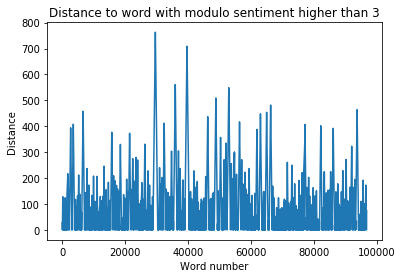

In [11]:
scores.plot()

In [13]:
results_path = '{}/outputs_11_09'.format(project_path)

In [14]:
for step in range(0, 4):
    for book in books.values():
        scores = distance_analysis.DistanceToWordWithModuloSentimentHigherThan(book, step)
        books_scores = scores.score(SLICE_SIZE, scored_input_words_df)
        scores.store_to_file(results_path)
    

In [28]:
analysis = [
            #slice_analysis.SumScoredByScoredCountAnalysis, 
            #slice_analysis.SumScoredByAllCountAnalysis, 
            #slice_analysis.SumScoredAnalysis,
            sentence_analysis.SumScoredByScoredCountPerSentenceAnalysis,
            #sentence_analysis.SumScoredByAllCountPerSentenceAnalysis,
            #sentence_analysis.SumScoredPerSentenceAnalysis,
            #sentence_analysis.NumberOfWordsWithSentimentPerSentenceAnalysis,
            #sentence_analysis.NumberOfWordsPerSentenceAnalysis
            ]

In [14]:
for book in books.values():
    for task in analysis:
        scores = task(book)
        books_scores = scores.score(SLICE_SIZE, scored_input_words_df)
        scores.store_to_file(results_path, with_header=True, with_slice_number=False)
        #scores.plot()
        

In [14]:
#for book in books.values():
#    book_summary_scores = book_analysis.BookAnalysis(book)
#    book_summary_scores.score(scored_input_words_df)
#    book_summary_scores.print()
#    book_summary_scores.store_to_file(results_path, with_header=True)